# Hotel Occupancy Data Generation - Single Hotel & Room Category


In [32]:
# Libraries

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
plt.style.use('ggplot')   

In [39]:
# Function to generate daily time series data
#
def generate_daily_timeseries(start_date, end_date, trend_slope, seasonal_amplitude, max):
    # Define the blank time series range and steps
    frequency = 'D'
    date_range = pd.date_range(start=start_date, end=end_date, freq=frequency)
    time = np.arange(len(date_range))

    # Generate a linear trend
    trend_component = trend_slope/365 * time

    # Generate seasonality variation
    seasonal_cycle_annual = 2 * np.pi / 365.25
    seasonal_component = seasonal_amplitude * np.sin(seasonal_cycle_annual * time )

    # Add Random noise
    noise_amplitude = 2
    noise_component = np.random.normal(0, noise_amplitude, len(date_range))

    # Create Time Series dataframe
    base_value = max / 2
    time_series = base_value + trend_component + seasonal_component + noise_component
    df = pd.DataFrame({'Date': date_range[:len(time_series)], 'Value': time_series})
    df.set_index('Date', inplace=True)


    return df


In [61]:
# Function to decompose a daily time series
#

def decompose_time_series(df):
    # Perform decomposition
    decomposition = seasonal_decompose(df['Value'], model='additive', period=365)

    # Plot the decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(12, 8), sharex=True)

    ax1.set_title('Observed', fontsize=12)
    ax1.plot(decomposition.observed, label='Observed')
    ax2.set_title('Trend', fontsize=12)
    ax2.plot(decomposition.trend, label='Trend', color='orange')
    ax3.set_title('Seasonal', fontsize=12)
    ax3.plot(decomposition.seasonal, label='Seasonal', color='green')
    ax4.set_title('Residuals', fontsize=12)
    #ax4.plot(decomposition.resid, label='Residuals', color='red')
    ax4.scatter(decomposition.resid.index, decomposition.resid, label='Residuals', color='red', s=10)

    plt.show()


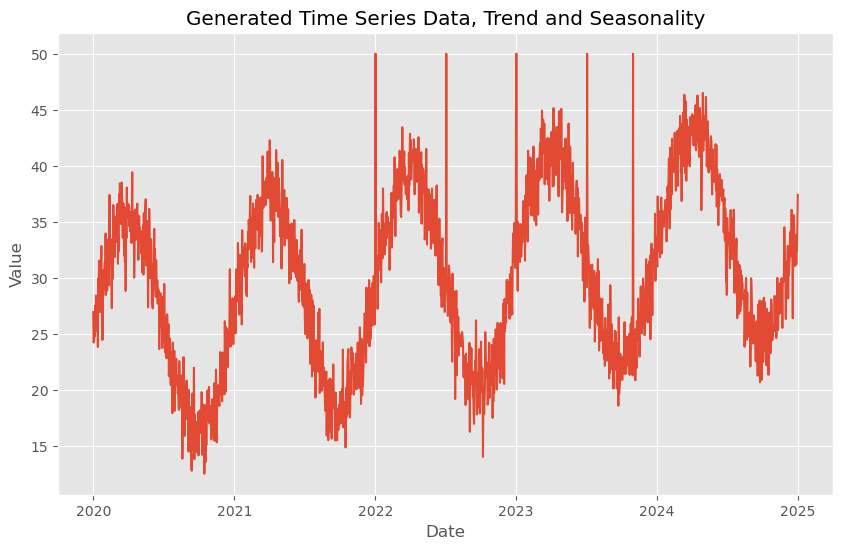

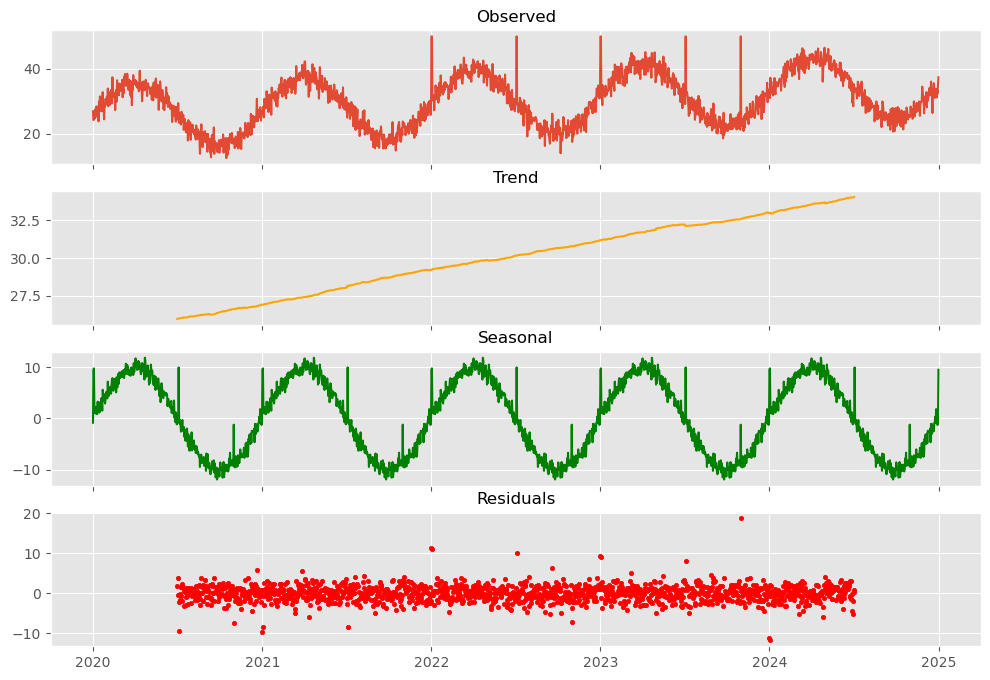

In [63]:
# Generate several time series for daily data over four years

# Generate time series, then add some special dates
min_rooms = 0
max_rooms = 50

premium_rooms = generate_daily_timeseries(start_date='2020-01-01', end_date='2024-12-31', 
                                          trend_slope=2, seasonal_amplitude=10, max=max_rooms)
# Add some specific holiday dates
special_dates = ['2022-01-01', '2022-01-02', '2022-07-04', '2023-01-01', '2023-01-02', '2023-07-04', '2023-10-31']
premium_rooms.loc[special_dates, 'Value'] = max_rooms

# Prevent -ve values or exceeding max capacity
premium_rooms['Value'] = premium_rooms['Value'].clip(lower=min_rooms)
premium_rooms['Value'] = premium_rooms['Value'].clip(upper=max_rooms)

# Plot the sample
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title(f'Generated Time Series Data, Trend and Seasonality')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

ax.plot(premium_rooms.index, premium_rooms['Value'])
plt.show()

# Decompose the sample
decompose_time_series(premium_rooms)
